<a href="https://colab.research.google.com/github/soumyajitbera49/AI_ML_Project_BrainTumorDetection/blob/main/Advanced_Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import warnings
 warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# count the number of images
ROOT_DIR = "/content/drive/MyDrive/Brain Tumor Dataset"
number_of_images = {}
for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('notumor', 250), ('glioma', 209), ('pituitary', 231), ('meningioma', 212), ('Train', 1), ('train', 4), ('val', 4), ('test', 4)])

In [5]:
number_of_images.items()

dict_items([('notumor', 250), ('glioma', 209), ('pituitary', 231), ('meningioma', 212), ('Train', 1), ('train', 4), ('val', 4), ('test', 4)])

In [6]:
len(os.listdir("/content/drive/MyDrive/Brain Tumor Dataset"))

8

In [7]:
import os
import shutil
import numpy as np
import math

def dataFolder(root_dir, split_dir, split_ratio):
    """
    Splits the images from root_dir into split_dir with the given split_ratio.
    Copies images instead of moving them to allow for multiple splits.
    Ensures subdirectories for each category are created.
    """
    split_path = os.path.join(root_dir, split_dir)

    # Create the split directory if it doesn't exist
    if not os.path.exists(split_path):
        os.mkdir(split_path)

    for category in os.listdir(root_dir):
        # Exclude the split directories themselves and any non-directory items
        # and explicitly exclude 'Train' directory
        if os.path.isdir(os.path.join(root_dir, category)) and category not in ['train', 'val', 'test', 'Train']:
            category_path = os.path.join(root_dir, category)
            split_category_path = os.path.join(split_path, category)

            # Create the category subdirectory within the split directory if it doesn't exist
            if not os.path.exists(split_category_path):
                os.makedirs(split_category_path)

            # Get the list of all image files in the category
            all_images = os.listdir(category_path)
            num_images_to_copy = math.ceil(split_ratio * len(all_images)) # Use ceil to ensure at least one image for small categories

            # Randomly select images to copy
            images_to_copy = np.random.choice(all_images, size=num_images_to_copy, replace=False)

            # Copy the selected images
            for img in images_to_copy:
                src = os.path.join(category_path, img)
                dst = os.path.join(split_category_path, img)
                shutil.copy(src, dst)

# Define the root directory
ROOT_DIR = "/content/drive/MyDrive/Brain Tumor Dataset"

# Clear out previously created split folders before recreating them
for folder in ['train', 'val', 'test']:
    split_folder_path = os.path.join(ROOT_DIR, folder)
    if os.path.exists(split_folder_path):
        shutil.rmtree(split_folder_path)

In [8]:
# Call the function to create the splits
dataFolder(ROOT_DIR, "train", 0.70)
dataFolder(ROOT_DIR, "val", 0.15) # Use 0.15 for validation
dataFolder(ROOT_DIR, "test", 0.15) # Use 0.15 for testing

In [9]:
number_of_images = {}
for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('notumor', 250), ('glioma', 209), ('pituitary', 231), ('meningioma', 212), ('Train', 1), ('train', 4), ('val', 4), ('test', 4)])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import MobileNet, preprocess_input

In [11]:
def preprocessingImages1(path):
  """
  input: path
  output: preprocessed images
  """
  image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, preprocessing_function= preprocess_input, horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path, target_size=(224, 224), batch_size=32, class_mode='categorical')
  return image

In [12]:
path = "/content/drive/MyDrive/Brain Tumor Dataset"
train_data = preprocessingImages1(os.path.join(path, "train"))

Found 633 images belonging to 4 classes.


In [13]:
train_data.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [14]:
def preprocessingImages2(path):
  """
  input: path
  output: preprocessed images
  """
  image_data = ImageDataGenerator(preprocessing_function= preprocess_input)
  image = image_data.flow_from_directory(directory=path, target_size=(224, 224), batch_size=32, class_mode='categorical')
  return image

In [15]:
path = "/content/drive/MyDrive/Brain Tumor Dataset"
test_data = preprocessingImages2(os.path.join(path, "test"))

Found 137 images belonging to 4 classes.


In [16]:
path = "/content/drive/MyDrive/Brain Tumor Dataset"
val_data = preprocessingImages2(os.path.join(path, "val"))

Found 137 images belonging to 4 classes.


# Model Training

In [23]:
from keras.layers import Dense, Flatten
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet
import keras

In [27]:
base_model = MobileNet(input_shape=(224, 224, 3), include_top=False)

In [28]:
for layer in base_model.layers:
  layer.trainable = False

In [36]:
X = Flatten()(base_model.output)
X = Dense(units=4, activation='softmax')(X)

model = Model(base_model.input, X)

In [30]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,329,218 (12.70 MB)

 Trainable params: 100,354 (392.01 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
### call back
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

## model checkpoint
mc = ModelCheckpoint(filepath="./model.h5", monitor='val_accuracy', verbose=1, save_best_only=True)

## early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1)

cb = [mc, es]

In [50]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
hist = model.fit(train_data,
                           steps_per_epoch=8,
                           epochs=30,
                           verbose=1,
                           callbacks=cb,
                           validation_data=val_data,
                           validation_steps=16)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8537 - loss: 2.3443
Epoch 1: val_accuracy did not improve from 0.94891
8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.8539 - loss: 2.3133 - val_accuracy: 0.8467 - val_loss: 1.6140
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8374 - loss: 1.6693
Epoch 2: val_accuracy did not improve from 0.94891
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.8415 - loss: 1.6191 - val_accuracy: 0.8905 - val_loss: 1.0501
Epoch 3/30
4/8 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8937 - loss: 1.5767
Epoch 3: val_accuracy did not improve from 0.94891
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.8931 - loss: 1.4396 - val_accuracy: 0.9416 - val_loss: 0.6859
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8893 - loss: 1.1421
Epoch 4: val_accuracy did not improve from 0.94891
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8912 - loss: 1.1193 - val_accuracy: 0.9270 - val_loss: 0.6207
Epoch 5/30
8/8 ━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.9412 - loss: 0.6322 - val_accuracy: 0.9635 - val_loss: 0.3051
Epoch 6/30
4/8 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9622 - loss: 0.2295
Epoch 6: val_accuracy improved from 0.96350 to 0.97080, saving model to ./model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9499 - loss: 0.2988 - val_accuracy: 0.9708 - val_loss: 0.3190
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9822 - loss: 0.1941
Epoch 7: val_accuracy did not improve from 0.97080
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9811 - loss: 0.2010 - val_accuracy: 0.9562 - val_loss: 0.3141
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9690 - loss: 0.1558
Epoch 8: val_accuracy did not improve from 0.97080
8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.9690 - loss: 0.1550 - val_accuracy: 0.9416 - val_loss: 0.4120
Epoch 8: early stopping


In [52]:
# load the best fit model
model = load_model('/content/model.h5')

In [53]:
acc = model.evaluate(test_data)[1]
print(f"The accuracy of the model is = {acc*100} %")

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9245 - loss: 0.6686
The accuracy of the model is = 92.70073175430298 %


In [55]:
h = hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

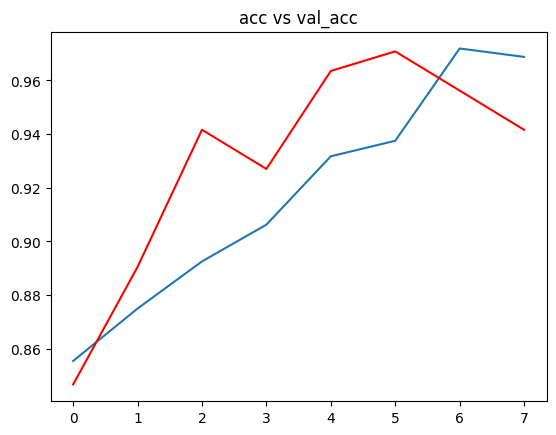

In [56]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c='red')
plt.title('acc vs val_acc')
plt.show()

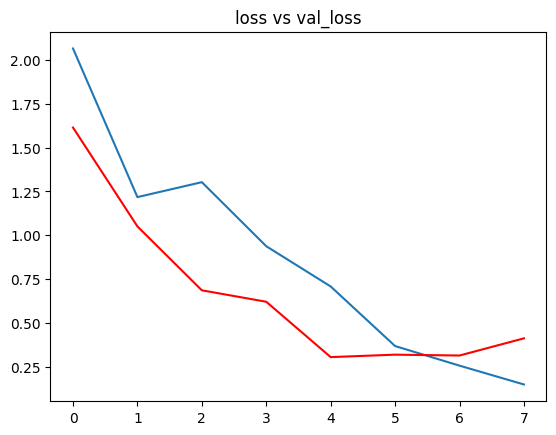

In [57]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c='red')
plt.title('loss vs val_loss')
plt.show()

In [58]:
from keras.preprocessing.image import load_img, img_to_array

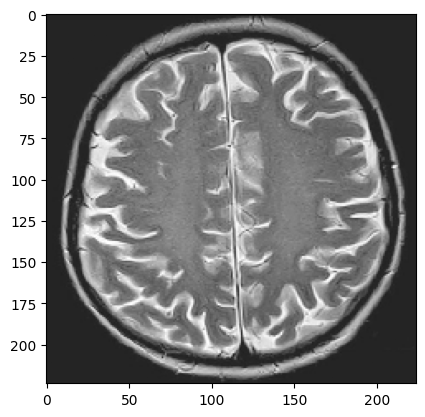

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
The person does not have a Tumor


In [60]:
path = "/content/drive/MyDrive/Brain Tumor Dataset/notumor/Tr-no_0315.jpg"
img = load_img(path, target_size=(224, 224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis=0)

pred = np.argmax(model.predict(input_arr))
pred

if pred == 0:
  print("The person has glioma Tumor")
elif pred == 1:
  print("The person has meningioma Tumor")
elif pred == 2:
  print("The person does not have a Tumor")
else:
  print("The person has pituitary Tumor")